In [ ]:
import tensorflow as tf
from keras.initializers import RandomNormal

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.models import Model

In [ ]:
def define_discriminator_block(inputs, n_filters, batch_norm=False):
    init = RandomNormal(mean=0.0, stddev=0.02) # kernel weights initialization

    x = Conv2D(filters=n_filters,
               kernel_size=(4, 4),
               strides=(2, 2),
               padding='same',
               kernel_initializer=init)(inputs)
    
    if batch_norm:
        x = BatchNormalization()(x, training=True)
    
    x = LeakyReLU(alpha=0.2)(x)

    return x

In [ ]:
def define_discriminator(inp_shape):
    init = RandomNormal(mean=0.0, stddev=0.02) # kernel weights initialization

    inp_src_img = Input(shape=inp_shape) # input source image
    inp_tar_img = Input(shape=inp_shape) # input target image

    # Concatenate source image and target image channel-wise
    concat_inp = Concatenate()([inp_src_img, inp_tar_img])

    d = define_discriminator_block(inputs=concat_inp, n_filters=64)
    d = define_discriminator_block(inputs=d, n_filters=128, batch_norm=True)
    d = define_discriminator_block(inputs=d, n_filters=256, batch_norm=True)
    d = define_discriminator_block(inputs=d, n_filters=512, batch_norm=True)
    d = Conv2D(filters=1, kernel_size=(4, 4), padding='same', kernel_initializer=init)(d)
    patch_output = sigmoid(d)

    return Model(inputs=[inp_src_img, inp_tar_img], outputs=patch_output)

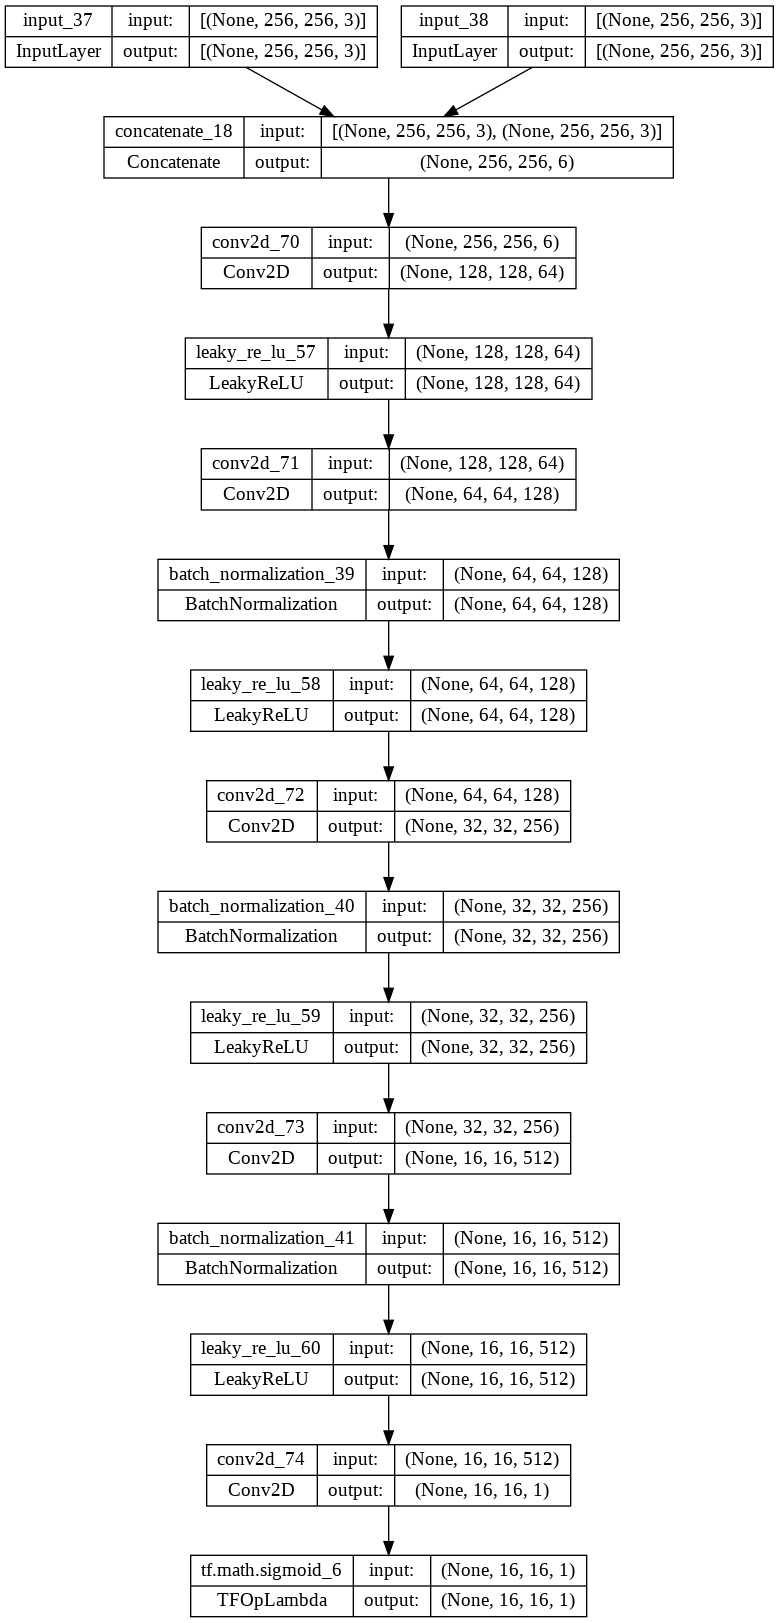

In [ ]:
# Get the discriminator model
discriminator = define_discriminator(inp_shape=(256,256,3)) # shape ?? check change from (600, 1200, 3)

# Compile the discriminator model
discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999)) # add loss weight

# Plot the discriminator model
tf.keras.utils.plot_model(discriminator, show_shapes=True)